Integrantes:

- Gustavo Acuña
- Benjamin Perez
- Eduardo Poblete

#1) Business Understanding

El negocio presente en este caso trata del banco conocido como Monopoly, el cual lleva muchos años atendiendo a sus clientes en Chile y que recientemente fue adquirido por un banco el cual tiene capitales extranjeros conocido como Dormammu. Se ha solicitado el hacer estudios sobre los clientes del banco Monopoly, con la finalidad de estudiar el comportamiento y detectar patrones, además de analizar cómo será la estrategia para abordar a estos nuevos clientes. De esta manera se ha extraído una base de datos, la cual contiene una muestra de clientes con 12 meses de información almacenada en variables mensuales por cada cliente. Estos datos deben ser analizados y limpiados, además de seleccionar variables las cuales sirvan para realizar una interpretación y entregar la mayor información posible a los dueños del banco, para que estos puedan conocer mejor a los clientes, junto con preparar una estrategia y abordar este nuevo mercado.

#2) Data Understanding

## 2.1 Preparación del entorno de desarrollo

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import VarianceThreshold
#encoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
#fin encoder
%matplotlib inline
sns.set(color_codes=True)

Importaciones a utilizar.

In [ ]:
#instanciar ruta del archivo
path = 'Base_clientes_Monopoly.xlsx'
#Leer los datos del excel
clientes_monopoly = pd.read_excel(path, header = 1)
#imprimir los datos
clientes_monopoly.head(10)

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,Consumo,Hipotecario,Debito,CambioPin,Cuentas,TC,CUPO_L1,CUPO_L2,CUPO_MX,FlgAct_T12,FlgActCN_T12,FlgActCI_T12,FlgActAN_T12,FlgActAI_T12,FlgActPAT_T12,FlgActCCPC_T12,FlgActCCOT_T12,FlgActCOL_T12,Fac_T12,Txs_T12,FacCN_T12,TxsCN_T12,FacCI_T12,TxsCI_T12,FacAN_T12,TxsAN_T12,FacAI_T12,TxsAI_T12,...,FlgActCOL_T01,Fac_T01,Txs_T01,FacCN_T01,TxsCN_T01,FacCI_T01,TxsCI_T01,FacAN_T01,TxsAN_T01,FacAI_T01,TxsAI_T01,FacPAT_T01,TxsPAT_T01,FacCCPC_T01,TxsCCPC_T01,FacCCOT_T01,TxsCCOT_T01,FacCOL_T01,TxsCOL_T01,FacDebCom_T01,TxsDebCom_T01,FacDebAtm_T01,TxsDebAtm_T01,Col_T01,ColL1T0_T01,ColL1TE_T01,ColL2T0_T01,ColL2AC_T01,ColL2CC_T01,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target,Unnamed: 574
0,1,160,M,13.0,43,NaN,130,1,1,0,0,1,0,0,1,NaN,1,3,798000,1012000.0,1210.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,55490.0,3.0,55490.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,204133,28,24000,2,1069735.0,0,1040339.0,0,0,29396,0.0,33000,0.0,1099866.0,0.0,1099866.0,15080,0.0,R,0,NaN
1,2,160,H,13.0,46,143640.0,69,1,0,0,0,1,0,1,0,NaN,1,1,750000,150000.0,1000.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19813.0,1.0,19813.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,118247,1,118247,1,0,0,0,0,0,0,0,0,118247,1,0,0,0,0,0,0,0,0,211884.0,0,162939.0,48945,0,0,0.0,300000,0.0,214592.0,0.0,214592.0,83596,0.0,R,0,NaN
2,3,170,H,13.0,45,929106.0,24,1,1,0,0,1,0,1,1,1.0,1,2,1350000,200000.0,1500.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123950.0,3.0,123950.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,191336,3,191336,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,162161,9,519000,11,7400.0,7400,0.0,0,0,0,0.0,216676,0.0,0.0,0.0,7400.0,0,0.0,T,0,NaN
3,4,151,H,13.0,46,172447.0,134,0,1,0,1,0,0,0,0,1.0,1,2,1570800,220001.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,44470.0,3.0,44470.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,11890,1,11890,1,0,0,0,0,0,0,0,0,11890,1,0,0,0,0,0,0,0,0,262160.0,0,244048.0,18112,0,0,0.0,60000,0.0,272762.0,0.0,272762.0,10591,0.0,R,0,NaN
4,5,170,H,13.0,46,805250.0,116,0,1,1,0,1,0,1,0,1.0,2,3,2762000,2.0,6430.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,138225.0,6.0,138225.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,173576,10,173576,10,0,0,0,0,0,0,0,0,70808,3,47000,1,0,0,0,0,0,0,306161.0,60008,0.0,214125,0,32028,0.0,272925,0.0,249562.0,0.0,75339.0,377782,0.0,R,0,NaN
5,6,170,H,13.0,47,707664.0,67,1,1,0,0,1,0,0,1,1.0,1,2,1312500,450000.0,714.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,134990.0,2.0,134990.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,21480,2,21480,2,0,0,0,0,0,0,0,0,14900,1,0,0,0,0,0,0,314000,4,39567.0,0,0.0,39567,0,0,0.0,35800,0.0,35800.0,0.0,0.0,51197,0.0,R,0,NaN
6,7,811,H,13.0,48,1022833.0,21,1,0,1,0,1,0,0,1,1.0,2,2,813000,160000.0,600.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,241750.0,26.0,233571.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,8353,1,0,0,0,0,0,0,0,0,8353,1,0,0,0,0,0,0,0,0,0,0,8353.0,8353,0.0,0,0,0,0.0,9391,0.0,8818.0,0.0,8818.0,0,0.0,T,0,NaN
7,8,170,H,13.0,46,NaN,69,0,1,1,0,1,0,0,1,NaN,2,3,1242000,1738000.0,1255.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45270.0,1.0,45270.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,33880,1,33880,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,198000,14,274600.0,57350,195830.0,21420,0,0,0.0,6000,0.0,283520.0,0.0,283520.0,0,0.0,R,0,NaN
8,9,170,H,13.0,49,1171066.0,33,0,0,0,0,1,0,0,1,1.0,1,1,1996400,1.0,2000.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,23980.0,1.0,23980.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,747201,10,486539.0,0,479539.0,0,0,7000,0.0,60000,0.0,507629.0,0.0,507629.0,0,0.0,R,1,NaN
9,10,170,M,13.0,44,964387.0,23,1,1,0,0,1,0,1,1,1.0,1,3,672000,3500000.0,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,23300,1,23300,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7613,1,17000,1,77106.0,45300,0.0,31806,0,0,0.0,92583,0.0,65487.0,0.0,65487.0,12084,0.0,R,0,NaN


Aquí realmente lo único importante a destacar, es que se usó la función clientes_monopoly.head(10) para poder verificar que los datos se cargaron de forma correcta. En este caso, también se solicitaron 10 filas a observar inicialmente para comprobar que todos los datos se encuentren presentes, y se consideró una cantidad apropiada para esta observación.

##2.2 Análisis de los atributos del conjunto de datos y sus dimensiones.

In [ ]:
#Numero total de columnas y filas
clientes_monopoly.shape

(51124, 575)

In [ ]:
clientes_monopoly.dtypes

Id                int64
Subsegmento       int64
Sexo             object
Region          float64
Edad              int64
                 ...   
UsoL2_T01         int64
UsoLI_T01       float64
IndRev_T01       object
target            int64
Unnamed: 574    float64
Length: 575, dtype: object

In [ ]:
clientes_monopoly.columns

Index(['Id', 'Subsegmento', 'Sexo', 'Region', 'Edad', 'Renta', 'Antiguedad',
       'Internauta', 'Adicional', 'Dualidad',
       ...
       'PagoNac_T01', 'PagoInt_T01', 'EeccNac_T01', 'EeccInt_T01', 'UsoL1_T01',
       'UsoL2_T01', 'UsoLI_T01', 'IndRev_T01', 'target', 'Unnamed: 574'],
      dtype='object', length=575)

Es importante antes de empezar a utilizar un algoritmo, o incluso antes de todo, realizar una exploración descriptiva de los datos. Este proceso nos permitirá entender mejor la información que contiene cada variable de la base de datos y escoger una muestra para analizar en este aprendizaje no supervisado. Algunas cosas que podríamos esperar podría ser:
- Que alguna columna tenga tipos de datos erróneos.
- Datos que no correspondan al tipo señalado por la columna.
y en este caso principalmente nos dará pistas sobre qué variables son adecuadas para predecir nuestro campo puebla.

In [ ]:
clientes_monopoly.describe()

,Id,Subsegmento,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,Consumo,Hipotecario,Debito,CambioPin,Cuentas,TC,CUPO_L1,CUPO_L2,CUPO_MX,FlgAct_T12,FlgActCN_T12,FlgActCI_T12,FlgActAN_T12,FlgActAI_T12,FlgActPAT_T12,FlgActCCPC_T12,FlgActCCOT_T12,FlgActCOL_T12,Fac_T12,Txs_T12,FacCN_T12,TxsCN_T12,FacCI_T12,TxsCI_T12,FacAN_T12,TxsAN_T12,FacAI_T12,TxsAI_T12,FacPAT_T12,...,FlgActCCOT_T01,FlgActCOL_T01,Fac_T01,Txs_T01,FacCN_T01,TxsCN_T01,FacCI_T01,TxsCI_T01,FacAN_T01,TxsAN_T01,FacAI_T01,TxsAI_T01,FacPAT_T01,TxsPAT_T01,FacCCPC_T01,TxsCCPC_T01,FacCCOT_T01,TxsCCOT_T01,FacCOL_T01,TxsCOL_T01,FacDebCom_T01,TxsDebCom_T01,FacDebAtm_T01,TxsDebAtm_T01,Col_T01,ColL1T0_T01,ColL1TE_T01,ColL2T0_T01,ColL2AC_T01,ColL2CC_T01,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,target,Unnamed: 574
count,51124.000000,51124.000000,51071.000000,51124.000000,3.775900e+04,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,51124.000000,31736.0,51124.000000,51124.000000,5.112400e+04,5.112400e+04,51124.000000,42873.000000,42873.000000,42873.000000,42873.000000,42873.000000,42873.000000,42873.000000,42873.000000,42873.000000,4.287300e+04,42873.000000,4.287300e+04,42873.000000,4.287300e+04,42873.000000,4.287300e+04,42873.000000,42873.000000,42873.000000,4.287300e+04,...,51124.000000,51124.000000,5.112400e+04,51124.000000,5.112400e+04,51124.000000,5.112400e+04,51124.000000,5.112400e+04,51124.000000,5.112400e+04,51124.000000,51124.000000,51124.000000,5.112400e+04,51124.000000,5.112400e+04,51124.000000,5.112400e+04,51124.000000,5.112400e+04,51124.000000,5.112400e+04,51124.000000,5.112400e+04,5.112400e+04,5.112400e+04,5.112400e+04,5.112400e+04,5.112400e+04,5.112400e+04,5.112400e+04,5.112400e+04,5.112400e+04,51124.000000,5.112400e+04,5.112400e+04,51124.000000,51124.000000,0.0
mean,25562.500000,182.024274,10.828220,38.702879,6.630771e+05,38.896154,0.684199,0.256181,0.381347,0.063141,0.925260,0.000900,0.137548,0.875284,1.0,1.407206,1.732376,1.133187e+06,3.283759e+05,1400.320047,0.659156,0.582068,0.033728,0.023045,0.002612,0.139435,0.277727,0.107667,0.003172,6.732317e+04,2.586850,5.687099e+04,2.224477,4.060128e+03,0.096284,1.724188e+03,0.032095,373.337824,0.005178,4.294533e+03,...,0.104413,0.003032,7.097639e+04,2.539355,5.920637e+04,2.161411,5.069743e+03,0.119846,2.333281e+03,0.047747,4.146368e+02,0.005007,3952.363821,0.205344,2.128750e+04,0.532470,1.229411e+04,0.133773,5.258277e+03,0.003091,6.967501e+04,4.755927,2.306400e+05,5.686136,3.015690e+05,2.986573e+04,1.207488e+05,3.368847e+04,6.786262e+04,4.416549e+04,5.237914e+03,7.637553e+04,1.734930e+03,1.939488e+05,7.323155,1.840923e+05,1.360327e+05,8.294372,0.089977,NaN
std,14758.371918,29.276596,3.392703,13.302573,4.092795e+05,35.672549,0.464839,0.436527,0.485722,0.243218,0.262974,0.029983,0.344428,0.330400,0.0,0.550357,0.877470,1.076922e+06,7.578185e+05,1597.344457,0.473998,0.493225,0.180529,0.150048,0.051045,0.346404,0.447883,0.309963,0.056233,1.248339e+05,3.746252,1.104570e+05,3.573449,4.297850e+04,0.815828,2.177396e+04,0.258366,10719.708366,0.145439,2.100321e+04,...,0.305798,0.054979,1.345565e+05,3.707367,1.175587e+05,3.521555,5.244459e+04,0.955300,2.348929e+04,0.342654,1.274503e+04,0.133617,20470.723940,0.651335,7.136115e+04,1.203759,1.259857e+05,0.448993,1.243488e+05,0.056554,1.556583e+05,9.147662,3.644859e+05,7.739201,5.222979e+05,7.673128e+04,2.614987e+05,8.167984e+04,4.224672e+05,1.081146e+05,4.852871e+04,1.490256e+05,4.235368e+04,2.884980e+05,108.161194,2.891731e+05,4.325389e+05,113.215624,0.286152,NaN
min,1.000000,151.000000,1.000000,9.000000,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.800000e+05,-2.000000,-4.800000e+05,-2.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,...

Aquí se utilizaron las funciones de shape, dtypes, columns y describe con el fin de poder observar más a fondo las cantidades de filas, columnas y los tipos de estos datos.

## 2.3 Selección de la muestra y análisis de las variables numéricas.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcefcab7450>,
      dtype=object)

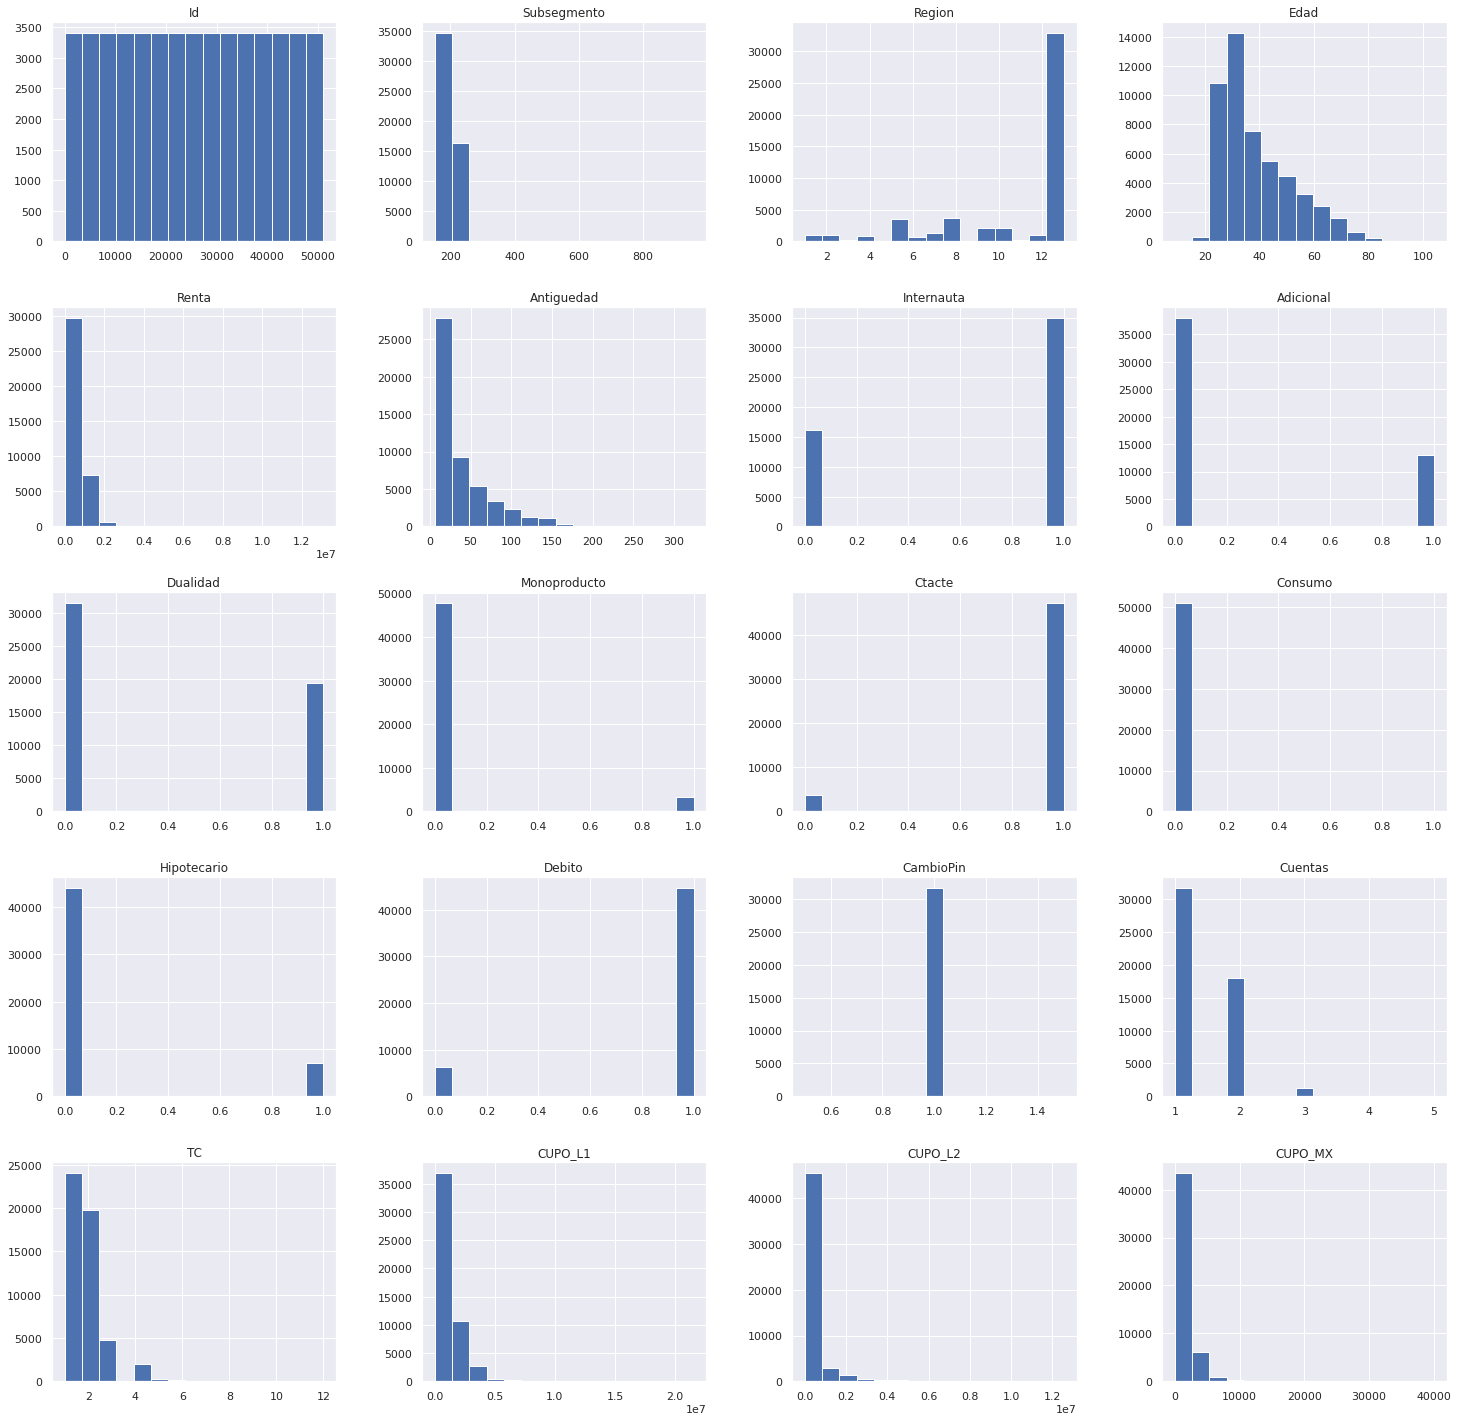

In [ ]:
analisis_muestra = clientes_monopoly.loc[:,'Id':'CUPO_MX']
analisis_muestra.hist(figsize=(25,25), bins = 15)

Primero que nada, se decide que la muestra a utilizar corresponde a las columnas desde Id hasta CUPO_MX. Esto es con el fin de poder encontrar alguna relación que se encuentre entre las variables que este conjunto, en donde, se puede obtener un perfil general del cliente del banco. De esta forma,
Se grafican las variables numéricas de nuestra muestra con histogramas para poder visualizar la distribución de cada una de estas.

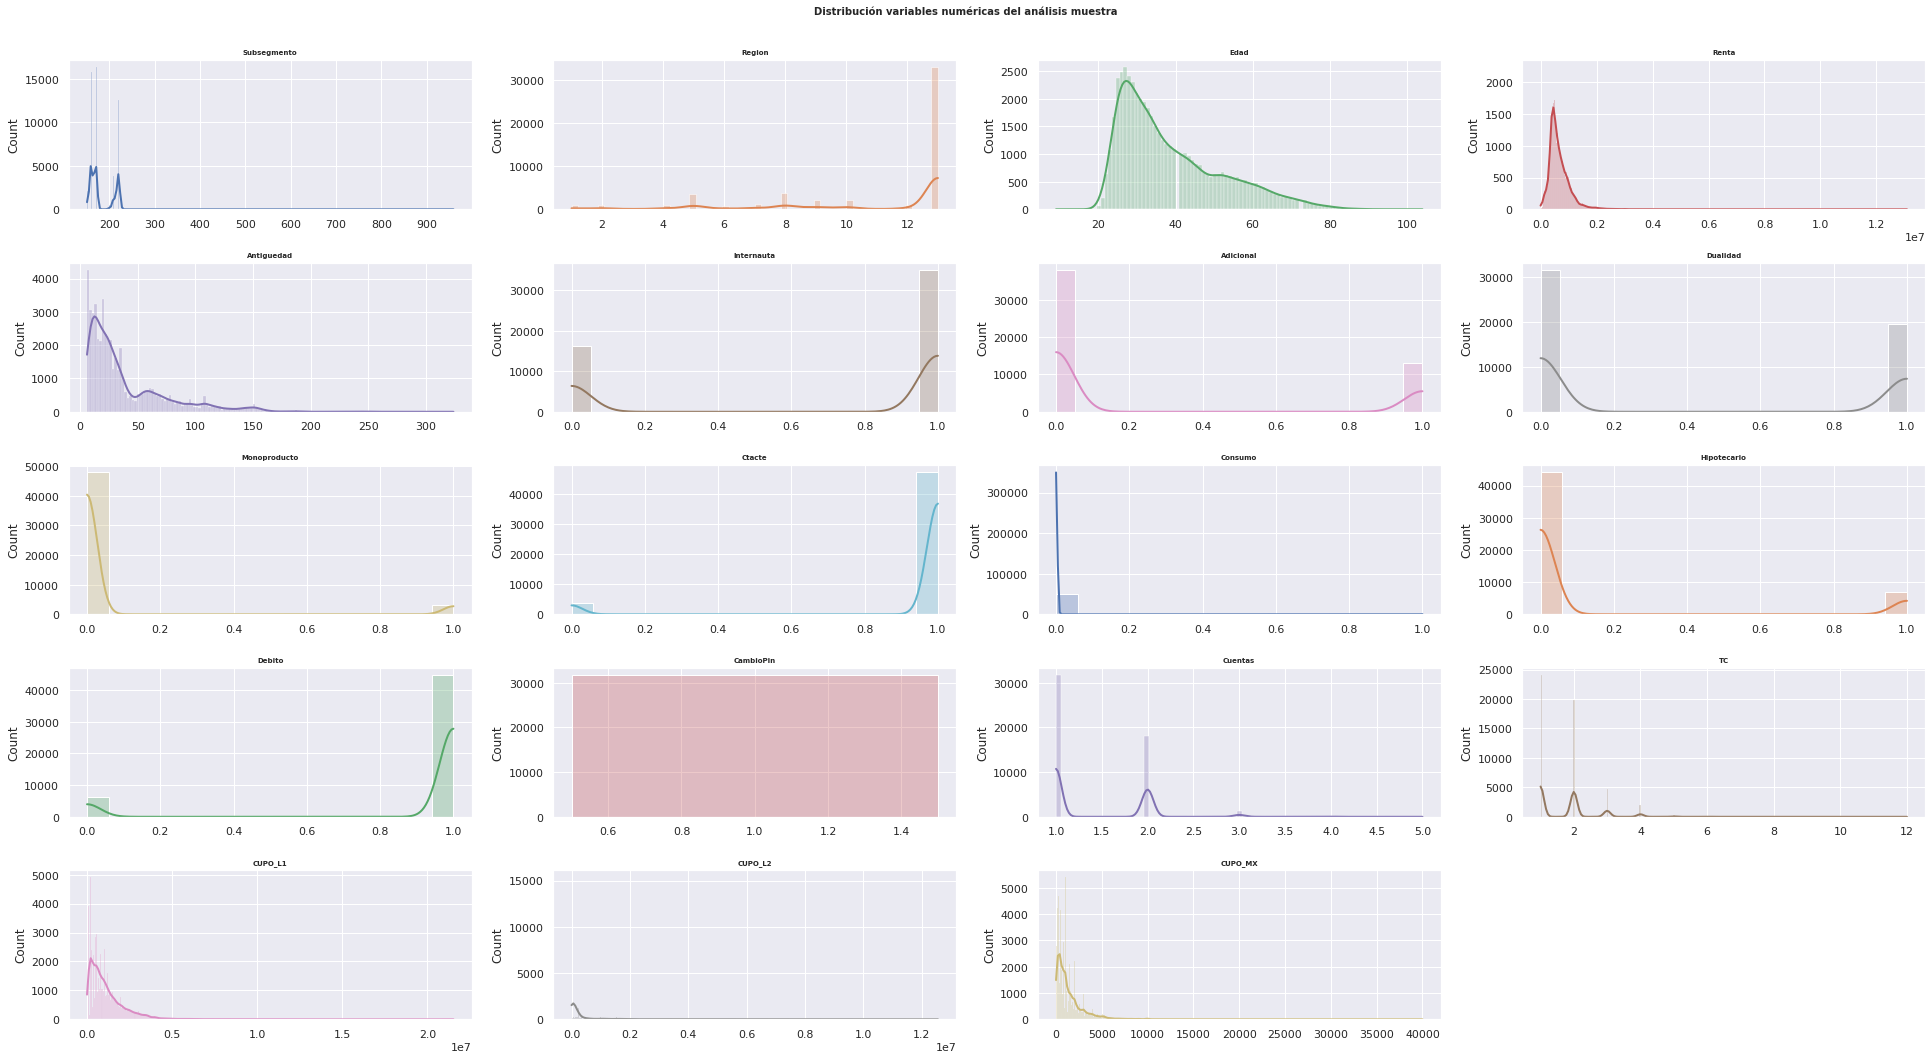

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(27, 15))
axes = axes.flat
columnas_numericas = analisis_muestra.select_dtypes(include=['float64', 'int']).columns
columnas_numericas = columnas_numericas.drop('Id')

for i, colum in enumerate(columnas_numericas):
    sns.histplot(
        data    = analisis_muestra,
        x       = colum,
        stat    = 'count',
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].set_xlabel("")

for i in [19]:
    fig.delaxes(axes[i])
fig.tight_layout()
fig.suptitle('Distribución variables numéricas del análisis muestra', fontsize = 10, fontweight = "bold");
plt.subplots_adjust(top = .93)

Sin embargo, complementando a la información previamente vista, se decidió utilizar histplot de Seaborn para obtener también una curva que indique un estimado de densidad para cada histograma. Además, se eliminó la columna Id ya que no proporcionaba ningún tipo de información relevante para continuar.

Cuando se crea un modelo es muy importante estudiar la distribución de los datos de la muestra que se sacó para identificar las variables independientes. Esto con el fin de poder obtener primeros vistazos del comportamiento de los datos, y así tener una idea general para proceder de manera más clara a la parte de preparación de los datos.

,Id,Subsegmento,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,Monoproducto,Ctacte,Consumo,Hipotecario,Debito,CambioPin,Cuentas,TC,CUPO_L1,CUPO_L2,CUPO_MX
Id,1.000000,0.054252,-0.013686,0.332918,0.015980,0.145347,-0.155182,0.050817,-0.093430,0.084117,-0.077225,0.007348,-0.094288,-0.121160,NaN,-0.087143,-0.011324,0.077089,-0.007330,0.065492
Subsegmento,0.054252,1.000000,-0.047450,-0.519442,0.010060,-0.271497,0.207811,-0.159026,-0.140818,-0.157122,0.160693,-0.006287,-0.091344,0.210611,NaN,-0.135712,-0.193553,-0.289034,-0.114036,-0.210464
Region,-0.013686,-0.047450,1.000000,0.010729,-0.007266,0.046028,0.054414,0.097302,0.014180,0.047502,-0.047878,-0.001173,-0.002617,-0.030331,NaN,0.013041,0.069545,0.031714,0.028457,0.037012
Edad,0.332918,-0.519442,0.010729,1.000000,0.143001,0.524487,-0.389240,0.235544,0.013080,0.243881,-0.244444,0.005035,0.050220,-0.363856,NaN,0.019989,0.176350,0.443795,0.126141,0.352824
Renta,0.015980,0.010060,-0.007266,0.143001,1.000000,0.086308,0.000227,0.035191,0.015237,0.045551,-0.040247,0.031051,0.222307,-0.041375,NaN,0.022330,0.039249,0.289283,0.081081,0.275007
Antiguedad,0.145347,-0.271497,0.046028,0.524487,0.086308,1.000000,-0.186996,0.284226,-0.029773,0.230606,-0.236351,-0.002784,0.051725,-0.367517,NaN,-0.000185,0.193539,0.522510,0.137759,0.402881
Internauta,-0.155182,0.207811,0.054414,-0.389240,0.000227,-0.186996,1.000000,-0.051376,0.049976,-0.280042,0.293365,-0.002068,0.068627,0.270448,NaN,0.048808,-0.004690,-0.118996,-0.009930,-0.081926
Adicional,0.050817,-0.159026,0.097302,0.235544,0.035191,0.284226,-0.051376,1.000000,0.042667,0.064676,-0.066647,-0.002667,0.046905,-0.132583,NaN,0.049081,0.662240,0.201825,0.066254,0.163346
Dualidad,-0.093430,-0.140818,0.014180,0.013080,0.015237,-0.029773,0.049976,0.042667,1.000000,-0.145209,0.153923,-0.000728,0.067156,0.132060,NaN,0.942404,0.662013,0.310016,0.097764,0.280539
Monoproducto,0.084117,-0.157122,0.047502,0.243881,0.045551,0.230606,-0.280042,0.064676,-0.145209,1.000000,-0.913425,-0.007791,-0.103676,-0.687749,NaN,-0.141669,-0.051428,0.088935,-0.014826,0.047312


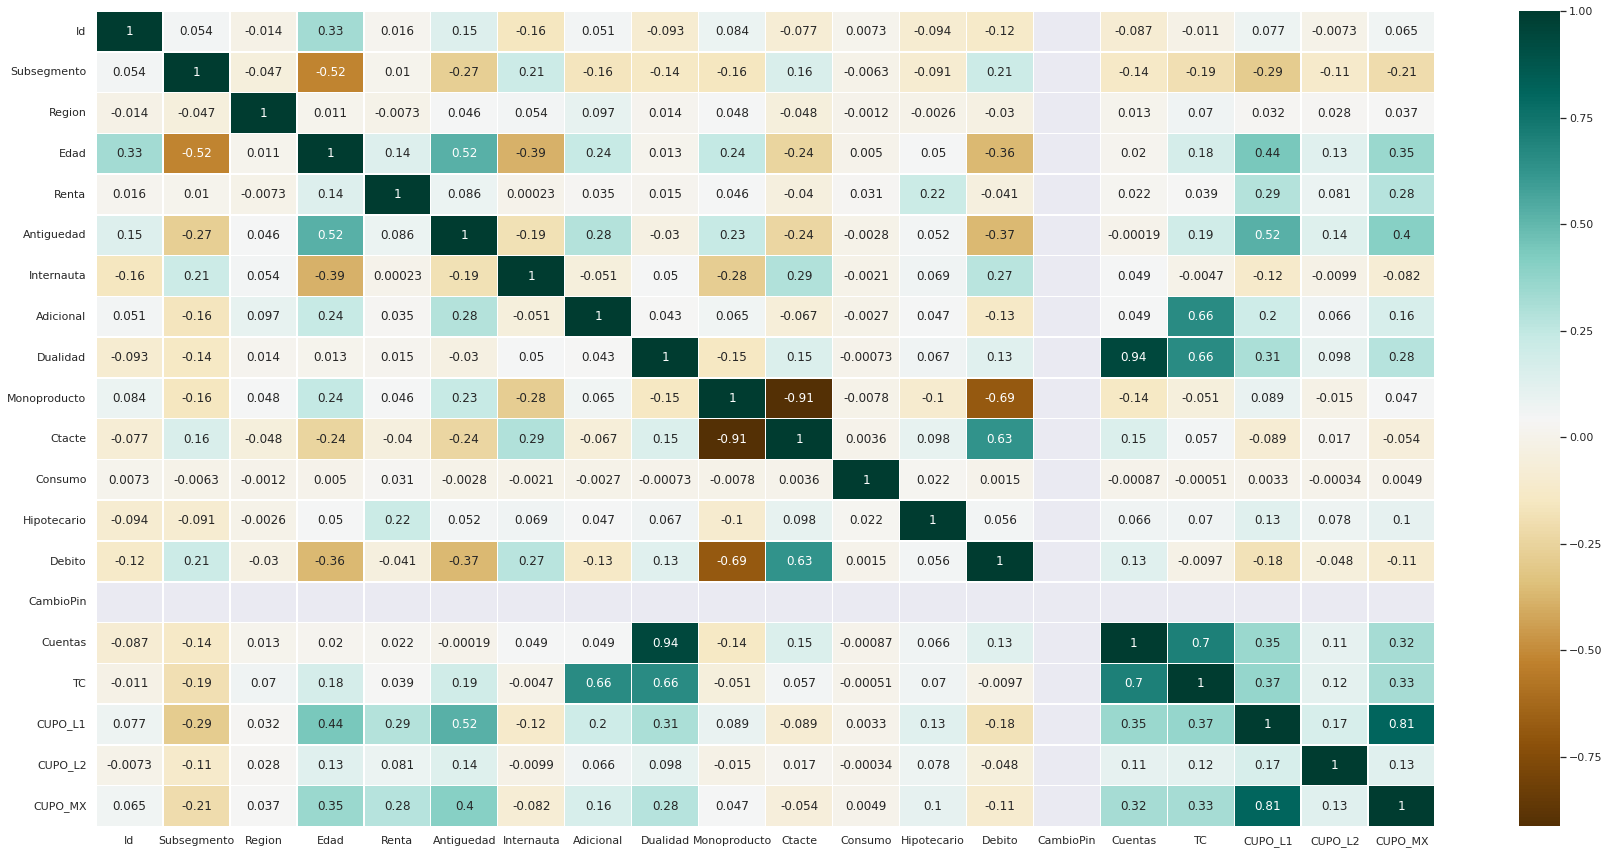

In [ ]:
#Relaciones entre las columnas del DataFrame
plt.figure(figsize=(30, 15))
corr_muestra = analisis_muestra.corr()
sns.heatmap(corr_muestra, cmap="BrBG", annot=True, linewidths=.5)
corr_muestra

Es importante estudiar la correlación entre las variables de la muestra que se va a estudiar ya que desde aquí se sacarán las variables de nuestros futuros algoritmos de aprendizaje no supervisado. Es por esto que queremos pasar todas las variables de estudio a una matriz de correlación. Es aquí donde evaluaremos cómo se comportan entre ellas y estimaremos que variables son adecuadas para observaciones que queramos rescatar de los datos, ¿Qué criterios utilizaremos?, según hemos aprendido algunos algoritmos se ven afectados si los predictores que se le entregan están altamente correlacionados entre ellos, por esta razón nos parece adecuado estimar en una correlación directa valores de las variables entre 50 hasta 90, en una correlación inversa de -50 a -90.

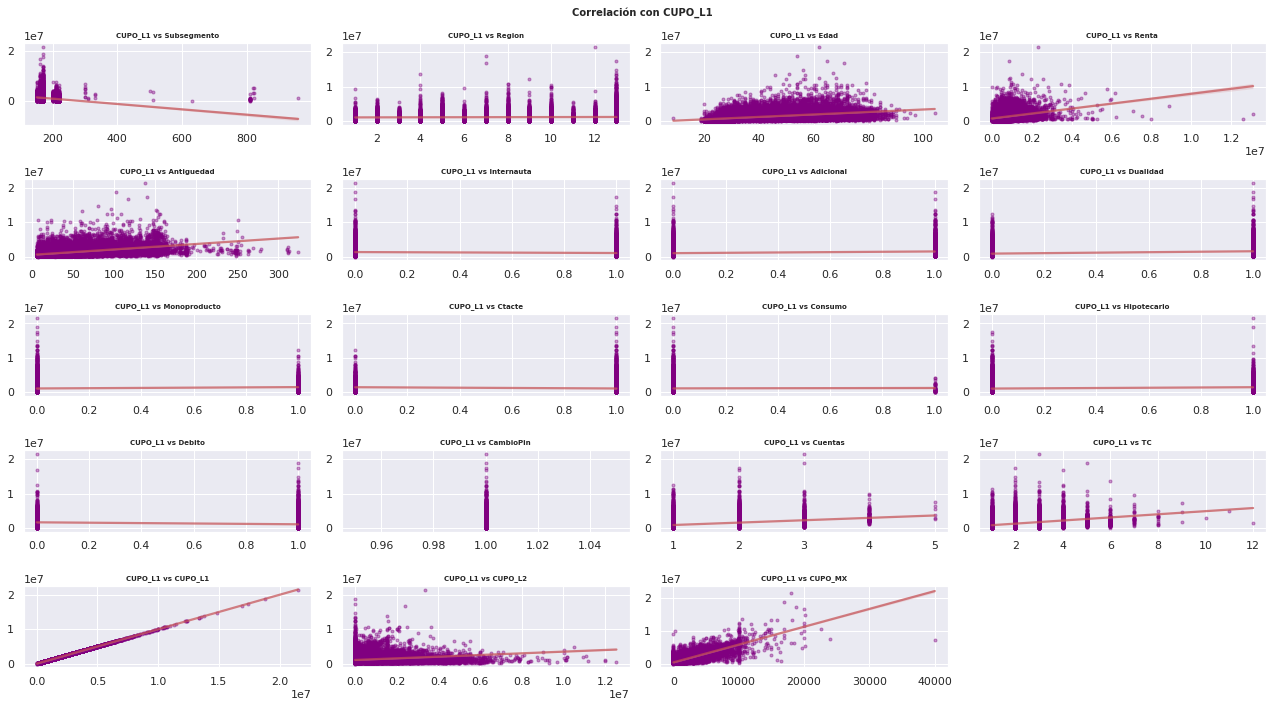

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(18, 10))
axes = axes.flat
columnas_numericas = analisis_muestra.select_dtypes(include=['float64', 'int']).columns
columnas_numericas = columnas_numericas.drop('Id')

for i, colum in enumerate(columnas_numericas):
    sns.regplot(
        x           = analisis_muestra[colum],
        y           = analisis_muestra['CUPO_L1'],
        color       = "purple",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"CUPO_L1 vs {colum}", fontsize = 7, fontweight = "bold")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

for i in [19]:
    fig.delaxes(axes[i])

fig.tight_layout()
fig.suptitle('Correlación con CUPO_L1', fontsize = 10, fontweight = "bold");
plt.subplots_adjust(top = .93)

Como se sabe, el objetivo del estudio es poder realizar observaciones que otorguen información relevante para el banco acerca de sus clientes, y como anteriormente se vio en el análisis, esta se hace en relación a la muestra que consideremos que represente un mayor valor informativo al banco, y de esta muestra poder medir la relación que hay entre cada variable esta. Analizando de esta manera, podemos ir formando una idea más clara de cómo se distribuyen los datos en relación a la muestra e identificar algún tipo de algoritmo que podría adecuarse a ciertas variables, como por ejemplo, TC, Adicional y dualidad. ?Estos podrían usarse en un algoritmo de K-Means. 

De esta manera se evaluará cada variable y a que algoritmo en particular podrían ajustarse.

## 2.4 Análisis de las variables cualitativas.

Text(0.5, 0, 'Cantidad total')

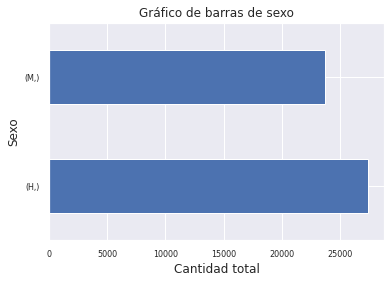

In [ ]:
columnas_object = analisis_muestra.select_dtypes(include=['object']).columns

analisis_muestra[columnas_object].value_counts().plot.barh()
plt.title('Gráfico de barras de sexo')
plt.tick_params(labelsize = 8)
plt.xlabel("Cantidad total")

En cuanto a variables cualitativas, anteriormente se contemplo que solamente hay una variable, con esta se decidió realizar un análisis sobre la variable Sexo, la cual se conforma de H = Hombre y M = Mujer. Con esto queremos ver cómo están divididos los datos, ver cuál tiene mayor cantidad de registros para posteriormente escoger la forma de imputación más adecuada si se encuentran datos nulos.

##2.5 Análisis de datos nulos y duplicados.

En cuanto a datos nulos y duplicados, antes de realizar alguna acción sobre ellos (ya sea eliminarlos o imputarlos) se debe de realizar un análisis, saber cuales y cuantos de estos datos contamos dentro de la base de datos la cual estamos trabajando, para una vez tener el conocimiento de estos, decidir qué acciones tomar sobre ellos. Es por ello, que se utilizaron las funciones que se verán a continuación.

In [ ]:
#filas con información duplicada
filas_duplicadas = analisis_muestra[analisis_muestra.duplicated()]
print('Cantida de filas duplicadas:', filas_duplicadas.shape)

Cantida de filas duplicadas: (0, 21)


In [ ]:
analisis_muestra.count()

Id              51124
Subsegmento     51124
Sexo            51123
Region          51071
Edad            51124
Renta           37759
Antiguedad      51124
Internauta      51124
Adicional       51124
Dualidad        51124
Monoproducto    51124
Ctacte          51124
Consumo         51124
Hipotecario     51124
Debito          51124
CambioPin       31736
Cuentas         51124
TC              51124
CUPO_L1         51124
CUPO_L2         51124
CUPO_MX         51124
dtype: int64

In [ ]:
analisis_muestra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51124 entries, 0 to 51123
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            51124 non-null  int64  
 1   Subsegmento   51124 non-null  int64  
 2   Sexo          51123 non-null  object 
 3   Region        51071 non-null  float64
 4   Edad          51124 non-null  int64  
 5   Renta         37759 non-null  float64
 6   Antiguedad    51124 non-null  int64  
 7   Internauta    51124 non-null  int64  
 8   Adicional     51124 non-null  int64  
 9   Dualidad      51124 non-null  int64  
 10  Monoproducto  51124 non-null  int64  
 11  Ctacte        51124 non-null  int64  
 12  Consumo       51124 non-null  int64  
 13  Hipotecario   51124 non-null  int64  
 14  Debito        51124 non-null  int64  
 15  CambioPin     31736 non-null  float64
 16  Cuentas       51124 non-null  int64  
 17  TC            51124 non-null  int64  
 18  CUPO_L1       51124 non-nu

In [ ]:
#Buscando los datos nulos de la muestra
print(analisis_muestra.isnull().sum())

Id                  0
Subsegmento         0
Sexo                1
Region             53
Edad                0
Renta           13365
Antiguedad          0
Internauta          0
Adicional           0
Dualidad            0
Monoproducto        0
Ctacte              0
Consumo             0
Hipotecario         0
Debito              0
CambioPin       19388
Cuentas             0
TC                  0
CUPO_L1             0
CUPO_L2             0
CUPO_MX             0
dtype: int64


Este paso resulta de vital importancia ya que la gran mayoría de los algoritmos no aceptan datos perdidos, y poder identificarlos con certeza será de gran ayuda al momento del proceso de tratamiento de estos mismos.

#3) Data Preparation

##3.1 Reformulación y extracción de atributos del conjunto de datos. 

In [ ]:
#Cambiar los nombres de las columnas a unas más entendibles.
analisis_muestra = analisis_muestra.rename(columns={'Internauta' : 'Usuario_Web', 'Adicional' : 'TC_Adicional', 'Dualidad' : 'TC_Dualidad',
                                                    'Monoproducto' : 'TC_Unica', 'Ctacte' : 'Cta_Corriente', 'Consumo': 'Cto_Consumo', 
                                                    'Hipotecario' : 'Cto_Hipotecario', 'Debito' : 'T_Debito', 'TC':'T_Credito', 'CUPO_L1' : 'CUPO_NAC',
                                                    'CUPO_L2' : 'CUPO_CUOT','CUPO_MX' : 'CUPO_INTERNAC'})
analisis_muestra.head(10)

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Usuario_Web,TC_Adicional,TC_Dualidad,TC_Unica,Cta_Corriente,Cto_Consumo,Cto_Hipotecario,T_Debito,CambioPin,Cuentas,T_Credito,CUPO_NAC,CUPO_CUOT,CUPO_INTERNAC
0,1,160,M,13.0,43,NaN,130,1,1,0,0,1,0,0,1,NaN,1,3,798000,1012000.0,1210.0
1,2,160,H,13.0,46,143640.0,69,1,0,0,0,1,0,1,0,NaN,1,1,750000,150000.0,1000.0
2,3,170,H,13.0,45,929106.0,24,1,1,0,0,1,0,1,1,1.0,1,2,1350000,200000.0,1500.0
3,4,151,H,13.0,46,172447.0,134,0,1,0,1,0,0,0,0,1.0,1,2,1570800,220001.0,0.0
4,5,170,H,13.0,46,805250.0,116,0,1,1,0,1,0,1,0,1.0,2,3,2762000,2.0,6430.0
5,6,170,H,13.0,47,707664.0,67,1,1,0,0,1,0,0,1,1.0,1,2,1312500,450000.0,714.0
6,7,811,H,13.0,48,1022833.0,21,1,0,1,0,1,0,0,1,1.0,2,2,813000,160000.0,600.0
7,8,170,H,13.0,46,NaN,69,0,1,1,0,1,0,0,1,NaN,2,3,1242000,1738000.0,1255.0
8,9,170,H,13.0,49,1171066.0,33,0,0,0,0,1,0,0,1,1.0,1,1,1996400,1.0,2000.0
9,10,170,M,13.0,44,964387.0,23,1,1,0,0,1,0,1,1,1.0,1,3,672000,3500000.0,1000.0


Desde aquí en adelante es importante comprender bien la estructura de los datos, y para esto, se ha decidido reformular las columnas con nombres que representan de mejor manera los datos que contienen; ya que es una muestra la que se está utilizando, no afectaría a la estructura original de la base de datos, y por su parte ayuda a esclarecer mucho más los siguientes procesos.

##3.2 Tratamiento de datos nulos.

Como anteriormente se realizó el análisis de los datos nulos presentes en la base de datos, ahora es cuando deben de tratarse. Para esto tenemos varias opciones:
- Eliminar los datos perdidos o duplicados.
- Trabajar con estos valores.
- Tratar de estimar los valores ausentes utilizando el resto del conjunto de datos.


In [ ]:
def simpleImputer(column, data_fill):
  analisis_muestra[column] = analisis_muestra[column].fillna(data_fill)
  return print("\033[4;32m"+'imputación realizada con éxito. DataFrame Actualizado!')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf2def7410>]],
      dtype=object)

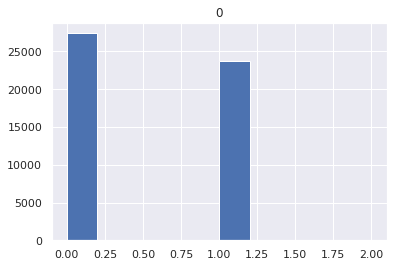

In [ ]:
#Limpiando los datos de sexo (simpleimputer)
le = preprocessing.LabelEncoder()
muestra_sexo = analisis_muestra['Sexo'].replace(np.nan, 'none', regex=True)#.replace porque requerimos de string o number para el label encoder.

muestra_sexo_le = le.fit_transform(muestra_sexo)

pd.DataFrame(muestra_sexo_le).hist()


In [ ]:
simpleImputer('Sexo', 'H')

imputación realizada con éxito. DataFrame Actualizado!


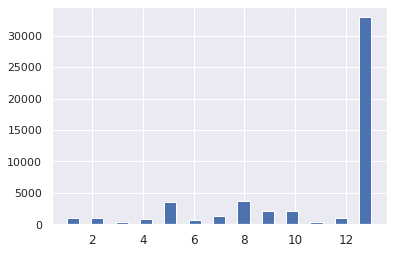

In [ ]:
#Region (simpleimputer)
analisis_muestra['Region'].hist(xlabelsize=12, bins=25)

In [ ]:
simpleImputer('Region', 13.0)

imputación realizada con éxito. DataFrame Actualizado!


In [ ]:
#renta (iterativeimputer)
imputer = KNNImputer(n_neighbors=3, weights="uniform")

array_renta_knn = imputer.fit_transform(analisis_muestra[['Id','Renta']])
df_renta_knn = pd.DataFrame(array_renta_knn)
df_renta_knn.columns = ['Id','Renta']
analisis_muestra['Renta'] = df_renta_knn['Renta']
print("\033[4;32m"+'DataFrame Actualizado!')


DataFrame Actualizado!


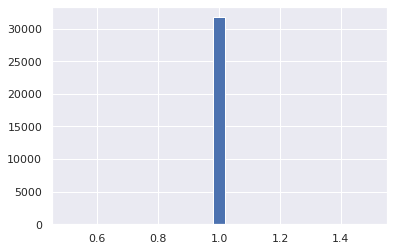

In [ ]:
#cambiopin
analisis_muestra['CambioPin'].hist(bins=25)

In [ ]:
simpleImputer('CambioPin', 1.0)

imputación realizada con éxito. DataFrame Actualizado!


In [ ]:
#Buscando los datos nulos de la muestra
print(analisis_muestra.isnull().sum())

Id                 0
Subsegmento        0
Sexo               0
Region             0
Edad               0
Renta              0
Antiguedad         0
Usuario_Web        0
TC_Adicional       0
TC_Dualidad        0
TC_Unica           0
Cta_Corriente      0
Cto_Consumo        0
Cto_Hipotecario    0
T_Debito           0
CambioPin          0
Cuentas            0
T_Credito          0
CUPO_NAC           0
CUPO_CUOT          0
CUPO_INTERNAC      0
dtype: int64


Las primeras dos opciones, aunque son sencillas, supondría perder información que podría resultar relevante para el banco. En el caso de eliminar variables, el impacto dependerá de cuanta información sea y qué valor aportan al modelo. Trabajar con los datos nulos, supone posibles errores en algunos algoritmos. Cuando se emplea la imputación, es muy importante tener en cuenta el riesgo que corremos al introducir valores estimados en campos que posiblemente sean observaciones y representen mucha influencia en el algoritmo.

Por estos motivos se ha decidido no optar por las primeras dos opciones, sino, que vamos a imputar los valores que están perdidos, ya que no corremos mucho riesgo después del análisis que hicimos en el punto 2. Pero con fines didácticos representaremos cada propiedad de forma individual (aunque ya se vió anteriormente en el punto 2).

##3.3 Tratamiento de OutLiers.

In [ ]:
def deleteOutliers(column_name, number):
  global analisis_muestra
  outliers =analisis_muestra[analisis_muestra[column_name] >= number].index
  analisis_muestra = analisis_muestra.drop(outliers)
  return print("\033[4;32m"+'OutLier(s) eliminado(s). DataFrame Actualizado!')

Para el caso de los Outliers, primeramente se debe analizar los valores atípicos presentes en los datos, para esto se utilizó boxplot, ya que nos permite representar de manera gráfica la serie de datos que estamos trabajando y así escoger cuales son los datos los cuales afectan al estudio del negocio, para posteriormente excluirlos, de esta forma se podrá obtener un análisis de datos más preciso. ¿Con qué criterios queremos eliminar los outliers? solo serán eliminados los más dispersos.

A continuación también queremos graficar cada una de las variables que presentaron datos nulos en el análisis anterior. ¿Cómo? utilizaremos los diagramas de caja y bigotes, con estos queremos ver distribuidos sus datos en cuartiles, pero ojo, los datos que están precisamente entre los bigotes exteriores (o extremos) no nos interesan en este caso, pues estarían dentro del rango de la media de los datos distribuidos, a nosotros en concreto nos interesan los datos que están por fuera del 50% central de la distribución, ya que, estos los tomaremos como outliers del conjunto de datos, aunque, no los trataremos todos.

También, para encontrar el index de los outliers identificados, imprimimos la variable, ordenando la lista de manera ascendente o descendente dependiendo de donde se hallen los registros. El valor de los datos se pasará a una función, y esta se encargará de eliminar los datos.

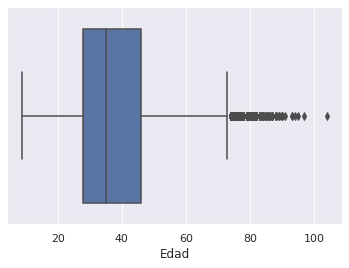

In [ ]:
#outliers Edad
sns.boxplot(x=analisis_muestra['Edad'])

In [ ]:
analisis_muestra['Edad'].sort_values(ascending= False)

35001    104
7295      97
7317      95
39516     94
40115     93
        ... 
38700     19
38727     19
34107     19
34159     19
35823      9
Name: Edad, Length: 51124, dtype: int64

In [ ]:
deleteOutliers('Edad', 75)

OutLier(s) eliminado(s). DataFrame Actualizado!


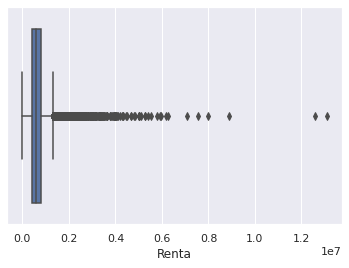

In [ ]:
#outliers Renta
sns.boxplot(x=analisis_muestra['Renta'])

In [ ]:
analisis_muestra['Renta'].sort_values(ascending= False).head(40)

43983    13089327.0
42780    12566667.0
49248     8870997.0
41236     8000000.0
48422     7529691.0
13631     7067177.0
44594     6248006.0
45688     6195983.0
31045     5980573.0
48485     5904000.0
43770     5790824.0
42969     5514989.0
514       5404920.0
42209     5278676.0
12415     5274570.0
489       5095834.0
28072     5010023.0
48475     5000000.0
42024     5000000.0
49076     5000000.0
114       4848389.0
37367     4787642.0
43338     4670711.0
48258     4653751.0
44522     4483803.0
34474     4438221.0
40810     4347045.0
662       4342277.0
21142     4263028.0
47646     4210868.0
25611     4090000.0
7739      4058224.0
50788     4035269.0
45150     4014413.0
42344     4000000.0
50749     4000000.0
25172     3999997.0
42859     3979578.0
46310     3926771.0
47575     3926569.0
Name: Renta, dtype: float64

In [ ]:
deleteOutliers('Renta', 4000000.0)

OutLier(s) eliminado(s). DataFrame Actualizado!


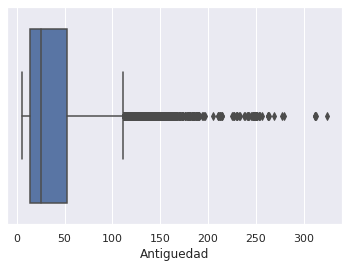

In [ ]:
#outliers Antiguedad
sns.boxplot(x=analisis_muestra['Antiguedad'])

In [ ]:
analisis_muestra['Antiguedad'].sort_values(ascending= False)

39994    324
39748    313
50328    312
42596    312
49987    312
        ... 
49557      6
26992      6
27018      6
6387       6
38198      6
Name: Antiguedad, Length: 50430, dtype: int64

In [ ]:
deleteOutliers('Antiguedad', 200)

OutLier(s) eliminado(s). DataFrame Actualizado!


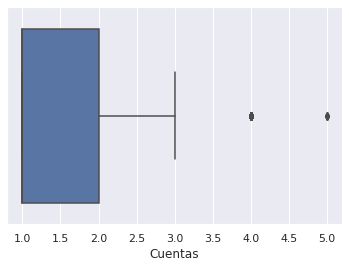

In [ ]:
#outliers cuentas
sns.boxplot(x=analisis_muestra['Cuentas'])

In [ ]:
analisis_muestra['Cuentas'].sort_values(ascending= False)

16655    5
7498     5
16453    5
42349    5
22154    5
        ..
30767    1
30766    1
30765    1
30764    1
0        1
Name: Cuentas, Length: 50365, dtype: int64

In [ ]:
deleteOutliers('Cuentas', 4)

OutLier(s) eliminado(s). DataFrame Actualizado!


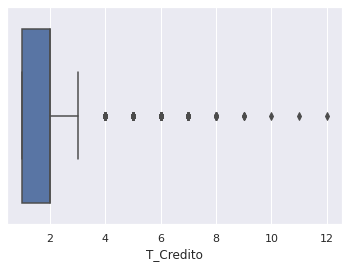

In [ ]:
#outliers T_Credito
sns.boxplot(x=analisis_muestra['T_Credito'])

In [ ]:
analisis_muestra['T_Credito'].sort_values(ascending= False)

2717     12
45663    11
39971    10
49015     9
40070     9
         ..
36298     1
19835     1
36297     1
36296     1
15445     1
Name: T_Credito, Length: 50258, dtype: int64

In [ ]:
deleteOutliers('T_Credito', 4)

OutLier(s) eliminado(s). DataFrame Actualizado!


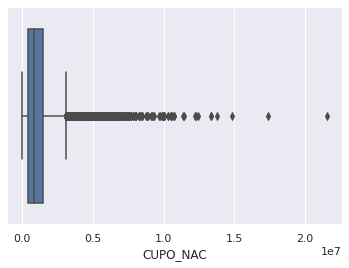

In [ ]:
#outliers
sns.boxplot(x=analisis_muestra['CUPO_NAC'])

In [ ]:
analisis_muestra['CUPO_NAC'].sort_values(ascending= False).head(40)

42797    21534000
41928    17400000
46672    14829000
41345    13800000
776      13340000
45750    13340000
43211    12402000
47873    12269260
47349    12243600
41400    11448000
46447    11340000
48759    10740000
47308    10694780
48818    10600000
16544    10500000
39496    10494000
40299    10494000
40506    10325000
46215    10312000
5183     10000000
990      10000000
39527    10000000
41701     9975000
39943     9964000
40769     9900000
40315     9900000
40569     9716000
42081     9630000
45090     9298300
48970     9212000
43914     9173600
5061      9072000
39343     8883000
320       8825000
43152     8750000
1128      8475000
40561     8470000
50106     8456600
39302     8454000
47264     8340600
Name: CUPO_NAC, dtype: int64

In [ ]:
deleteOutliers('CUPO_NAC', 10000000)

OutLier(s) eliminado(s). DataFrame Actualizado!


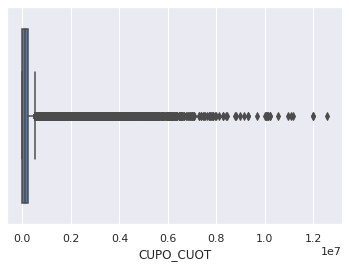

In [ ]:
#outliers
sns.boxplot(x=analisis_muestra['CUPO_CUOT'])

In [ ]:
analisis_muestra['CUPO_CUOT'].sort_values(ascending= False)

44611    12550000.0
831      12000000.0
46283    11990000.0
49352    11168000.0
45626    11080330.0
            ...    
3190            0.0
23034           0.0
23031           0.0
23447           0.0
3841            0.0
Name: CUPO_CUOT, Length: 47918, dtype: float64

In [ ]:
deleteOutliers('CUPO_CUOT', 8000000.0)

OutLier(s) eliminado(s). DataFrame Actualizado!


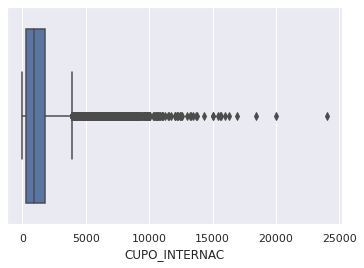

In [ ]:
#outliers
sns.boxplot(x=analisis_muestra['CUPO_INTERNAC'])

In [ ]:
analisis_muestra['CUPO_INTERNAC'].sort_values(ascending= False)

1880     24000.0
41565    20000.0
47007    18450.0
39343    16900.0
40283    16320.0
          ...   
49096        0.0
12808        0.0
4663         0.0
4661         0.0
41697        0.0
Name: CUPO_INTERNAC, Length: 47890, dtype: float64

In [ ]:
deleteOutliers('CUPO_INTERNAC', 10000.0)

OutLier(s) eliminado(s). DataFrame Actualizado!


Cabe resaltar que, en los diagramas de caja y bigotes, no buscamos eliminar todos los datos atípicos, ya que sería eliminar una gran cantidad de datos que otorgan información al modelo, pero tampoco podemos trabajar con todos los outliers, ya que el modelo K-Means es muy sensible a estos. Pero, volviendo al punto anterior la mayoría de estos datos se consideran atípicos porque las columnas contienen valores muy bajos en su mayoría, y al igual que en la imputación, no queremos afectar a gran escala la cantidad de registros de la muestra, así que, como medida, se intento eliminar lo justo y necesario.

##3.4 Eliminar columnas con varianza 0 o proximas a 0.

In [ ]:
le = preprocessing.LabelEncoder()
sexo_label = data_categorica_trans = le.fit_transform(analisis_muestra['Sexo'].replace(np.nan, 'none', regex=True))
analisis_muestra['Sexo'] = sexo_label
analisis_muestra['Sexo']

0        1
1        0
2        0
3        0
4        0
        ..
51119    0
51120    0
51121    0
51122    1
51123    0
Name: Sexo, Length: 47792, dtype: int64

A los modelos que queremos implementar queremos entregarle variables que resulten representativas para el estudio, es decir no incluir predictores que posean cero varianza, ya que estos no aportan información real para el estudio. Tampoco resultaría conveniente dejarlas ya que en la práctica podrían resultar contraproducentes, ya que con la poca cantidad de variedad de datos podría alterar el resultado de nuestra predicción. Es importante realizarlo antes de la estandarización, ya que luego todos los predictores tendrán varianza 1 y la clase a utilizar VarianceThreshold eliminaría todo.

In [ ]:
selector = VarianceThreshold(threshold=0)
selected_columns = selector.fit_transform(analisis_muestra)

columns_names = analisis_muestra.columns.drop('CambioPin') 

filtro_var = pd.DataFrame(selected_columns, columns = columns_names)
filtro_var

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Usuario_Web,TC_Adicional,TC_Dualidad,TC_Unica,Cta_Corriente,Cto_Consumo,Cto_Hipotecario,T_Debito,Cuentas,T_Credito,CUPO_NAC,CUPO_CUOT,CUPO_INTERNAC
0,1.0,160.0,1.0,13.0,43.0,415064.333333,130.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,3.0,798000.0,1012000.0,1210.0
1,2.0,160.0,0.0,13.0,46.0,143640.000000,69.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,750000.0,150000.0,1000.0
2,3.0,170.0,0.0,13.0,45.0,929106.000000,24.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,2.0,1350000.0,200000.0,1500.0
3,4.0,151.0,0.0,13.0,46.0,172447.000000,134.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,1570800.0,220001.0,0.0
4,5.0,170.0,0.0,13.0,46.0,805250.000000,116.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,2.0,3.0,2762000.0,2.0,6430.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47787,51120.0,160.0,0.0,13.0,51.0,364978.000000,57.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,3.0,999000.0,1000.0,550.0
47788,51121.0,170.0,0.0,13.0,51.0,625376.000000,39.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1744200.0,1.0,300.0
47789,51122.0,160.0,0.0,13.0,47.0,806220.000000,153.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,1061000.0,194700.0,1526.0
47790,51123.0,160.0,1.0,13.0,47.0,757491.333333,11.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1612000.0,300000.0,2300.0


In [ ]:
#filtro_var.loc[:,'Subsegmento':'CUPO_INTERNAC'].to_excel('clientes_monopoly_muestra.xlsx')
path = 'clientes_monopoly_muestra.xlsx'
#Leer los datos del excel
muestra_limpia = pd.read_excel(path)
muestra_limpia = muestra_limpia.drop('Unnamed: 0', axis=1)

##3.5 Obtención de las muestras para el modelo.


- Estas tres muestras forman parte del conjunto muestral que se utilizará para aplicar K-Means. La idea de escoger estos conjuntos de variables es, en primer lugar que son variables cuantitativas continuas, con lo que se adaptaran mejor al algoritmo. También, fueron escogidas porque nos interesa saber cómo se relacionan las observaciones entre los diferentes clusters, poder observar cómo se agrupan y entregar información valiosa para el cliente, como podría ser por ejemplo, que de la primera muestra, el grupo con mayor densidad de datos está integrado por clientes que llevan bastante tiempo perteneciendo al banco, mayores de 30 años y con una renta superior a los 600.000 mil pesos. Esto podría entregarle al banco información de sus clientes y poder aumentar la cantidad de servicios para proporcionar una mayor satisfacción a estos clientes, quizá poder recompensarlos por su fidelidad, entre otras cosas.


In [ ]:
muestra_1 = muestra_limpia[['Antiguedad','Edad','Renta']]
muestra_2 = muestra_limpia[['Renta','CUPO_NAC']]
muestra_3 = muestra_limpia[['Antiguedad', 'CUPO_NAC']]

#4) Modeling y Evaluación

In [ ]:
from sklearn.datasets import make_blobs

from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (12, 6)
plt.style.use('ggplot')

from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score

##4.1 Aplicando el escalado de datos.

Al igual que en el aprendizaje supervisado, los modelos del aprendizaje no supervisado son sensibles a la escala a la que se miden las variables y su varianza que se le están asignando, estas características pueden posteriormente afectar a los resultados del clustering, ya que si una variable tiene una escala mayor que el resto dominará en el valor de distancia / similitud de las observaciones, esto luego puede alterar la dirección del centroide.
Por esto lo que queremos realizar en este apartado será escalar y centrar las variables  antes de aplicar el modelo, para que las distancias tengan media 0 y desviación estándar de 1. Esto nos ayudará a establecer una homogeneidad en los pesos de las variables.


In [ ]:
sc_muestra1 = scale(muestra_1)
sc_muestra2 = scale(muestra_2)
sc_muestra3 = scale(muestra_3)  

##4.2 Evaluación de clusters para los modelos de las muestras.

El método del codo (Elbow) resulta importante para el modelo K-Means, ya que nos ayudará a encontrar el número óptimo de clusters que debería tener nuestra muestra. La idea que tenemos para este algoritmo es entregarle la muestra, que se represente gráficamente el resultado obtenido, y poder identificar en la curva, el punto de quiebre donde esta se empiece a volver cada vez más horizontal.

En nuestro caso, utilizaremos el modelo K-Means, eso quiere decir que, las observaciones se van a agrupar de una manera en la que la varianza total intra-cluster sea la menor posible. Por esto queremos usar el método del codo, ya que este calcula la varianza intra-cluster contrastandolo con x cantidad de clusters y los grafica. De aquí nosotros discernimos cual es la mejor opción.


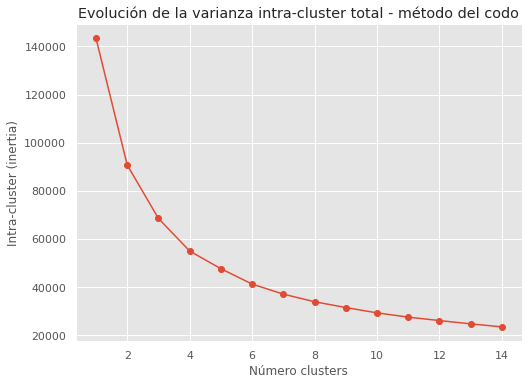

In [ ]:
rango_clusters = range(1, 15)
inertias = []

for i in rango_clusters:
    modelo_kmeans = KMeans(
                        n_clusters = i, 
                        n_init       = 20, 
                        random_state = 123
                    )
    modelo_kmeans.fit(sc_muestra1)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(8, 5.84))
ax.plot(rango_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total - método del codo")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)');

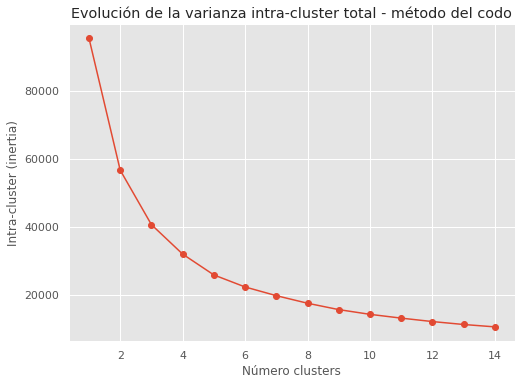

In [ ]:
rango_clusters = range(1, 15)
inertias = []

for i in rango_clusters:
    modelo_kmeans = KMeans(
                        n_clusters = i, 
                        n_init       = 20, 
                        random_state = 123
                    )
    modelo_kmeans.fit(sc_muestra2)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(8, 5.84))
ax.plot(rango_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total - método del codo")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)');

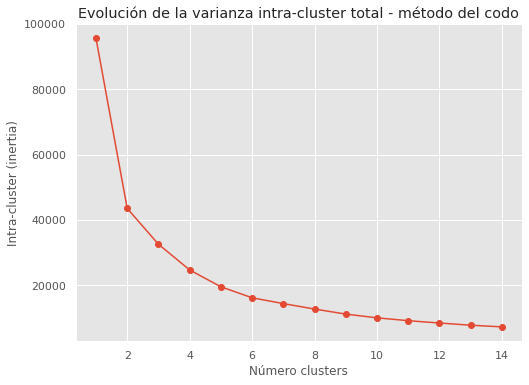

In [ ]:
rango_clusters = range(1, 15)
inertias = []

for i in rango_clusters:
    modelo_kmeans = KMeans(
                        n_clusters = i, 
                        n_init       = 20, 
                        random_state = 123
                    )
    modelo_kmeans.fit(sc_muestra3)
    inertias.append(modelo_kmeans.inertia_)

fig, ax = plt.subplots(1, 1, figsize=(8, 5.84))
ax.plot(rango_clusters, inertias, marker='o')
ax.set_title("Evolución de la varianza intra-cluster total - método del codo")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Intra-cluster (inertia)');

##4.3 Aplicando el modelo K-Means.

El modelo k-means es explicado como un algoritmo que se encarga de hacer una agrupación de las observaciones. Esta agrupación de observaciones está definida por un parámetro llamado K clusters. Y lo que busca este algoritmo es que la suma de las varianzas internas de los clusters sea la menor posible y la distancia inter-cluster sea la mayor posible.
Con este modelo lo que queremos lograr es establecer un nivel de similitud entre las variables agrupandolas y poder obtener información relevante para el estudio de los clientes del banco.

Otro algoritmo que queremos emplear para este análisis es el pca, pero ¿Para qué? pues porque los data frame que pasaremos como muestra al algoritmo contienen una gran densidad de registros sumado a que en su mayoría son 2 o más características que serán entregadas al algoritmo. Debido a esto no es posible hacer un gráfico que las represente a todas, para eso utilizaremos la técnica de análisis de componentes principales, también llamada PCA, la que nos permitirá reducir la dimensionalidad de todas las variables creando dos componentes principales que logren representar lo mejor posible al total de las variables originales.


###4.3.1 Primera muestra.

In [ ]:
modelo_kmeans = KMeans(n_clusters=3, n_init=25, random_state=123)
modelo_kmeans.fit(sc_muestra1)

KMeans(n_clusters=3, n_init=25, random_state=123)

In [ ]:
muestra_1['kmean_clusters'] = modelo_kmeans.labels_
muestra_1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Antiguedad,Edad,Renta,kmean_clusters
0,130,43,415064.333333,2
1,69,46,143640.000000,2
2,24,45,929106.000000,0
3,134,46,172447.000000,2
4,116,46,805250.000000,2
...,...,...,...,...
47787,57,51,364978.000000,2
47788,39,51,625376.000000,2
47789,153,47,806220.000000,2
47790,11,47,757491.333333,1


In [ ]:
from sklearn.decomposition import PCA

pca= PCA(n_components= 2)
pca_muestra1 = pca.fit_transform(sc_muestra1)
pca_muestra1_df = pd.DataFrame(data= pca_muestra1, columns=['componente_1', 'componente_2'])
pca_nombres_muestra1 = pd.concat([pca_muestra1_df, muestra_1[['kmean_clusters']]], axis=1)

pca_nombres_muestra1

,componente_1,componente_2,kmean_clusters
0,1.895173,-1.575934,2
1,0.576055,-1.789425,2
2,0.429170,0.811202,0
3,1.890711,-2.323613,2
4,2.177046,-0.412048,2
...,...,...,...
47787,0.834560,-1.137249,2
47788,0.742903,-0.250664,2
47789,2.963960,-0.772642,2
47790,0.106359,0.433447,1


Text(0.5, 1.0, 'Clusters generados por Kmeans')

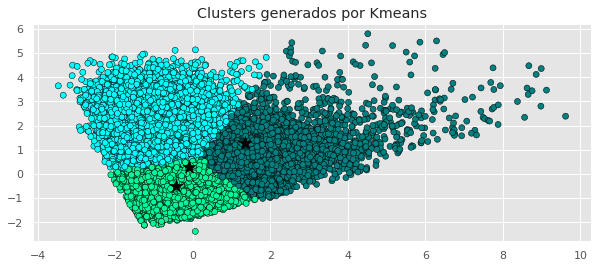

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
color_theme = np.array(['teal', 'mediumspringgreen', 'cyan'])
ax.scatter(
    y = pca_nombres_muestra1.componente_1,
    x = pca_nombres_muestra1.componente_2, 
    c = color_theme[pca_nombres_muestra1.kmean_clusters],
    marker    = 'o',
    edgecolor = 'black'
)
    
ax.scatter(
    x = modelo_kmeans.cluster_centers_[:, 0],
    y = modelo_kmeans.cluster_centers_[:, 1],   
    c = 'black',
    s = 200,
    marker = '*',
)
ax.set_title('Clusters generados por Kmeans')

Text(0.5, 0.92, 'Clusters generados por Kmeans (3D)')

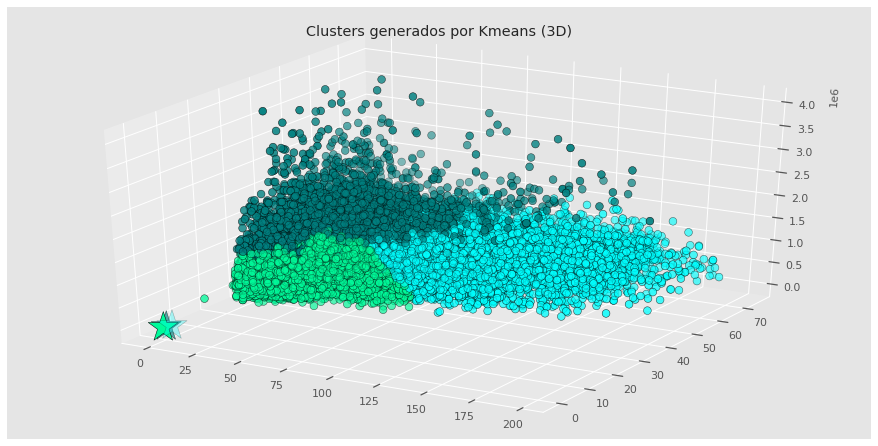

In [ ]:
X = np.array(muestra_limpia[['Antiguedad','Edad','Renta']])

# Predicting the clusters
labels = modelo_kmeans.predict(sc_muestra1)

# Getting the cluster centers
C = modelo_kmeans.cluster_centers_

colores=['teal', 'mediumspringgreen', 'cyan']
asignar=[]

for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(
    X[:, 0],
    X[:, 1],
    X[:, 2],
    c=asignar,
    s=60,
    marker    = 'o',
    edgecolor = 'black'
    )
    
    
ax.scatter(
    C[:, 0], 
    C[:, 1], 
    C[:, 2], 
    marker='*', 
    c=colores, 
    s=1000,
    edgecolor = 'black'
    )
ax.set_title('Clusters generados por Kmeans (3D)')

In [ ]:
cantidadGrupo1 =  pd.DataFrame()
cantidadGrupo1['color']=colores
cantidadGrupo1['cantidad']=muestra_1.groupby('kmean_clusters').size()
cantidadGrupo1

,color,cantidad
0,teal,7171
1,mediumspringgreen,30163
2,cyan,10458


En la muestra 1 se van a dividir las muestras en 3 agrupaciones (clusters) mediante K-means, utilizando la antigüedad, la edad y la renta. Esto, con el fin de encontrar en estos datos una similitud entre ellos, la cual puede ser beneficiosa para el análisis y, consecuentemente, para el banco mismo.

Una vez realizada la graficación de los clusters en un modelo 2D, podemos observar que las muestras se encuentran en su mayor parte agrupadas sin una mayor varianza presente en ellas. Sin embargo, se puede evidenciar que uno de los centroides no se encuentra localizado en uno de los clusters, teniendo 2 centroides ubicados en el cluster 1 y uno en el cluster 0. Al haber visto los datos en un plano 2D, también decidimos observar cómo se visualizarán si se agrega una dimensión más ¿Se seguirán viendo de una forma similar? ¿Podría haber un cambio notable el cual sea digno de mencionar?, es así como se llevaron las muestras a un plano 3D. En este modelo se puede notar, desde otra perspectiva, la cantidad de muestras las cuales poseen los 3 clusters, los cuales, al igual que el modelo 2D, siguen viéndose mayormente agrupados entre ellos.

Una vez graficados los clusters en ambos modelos, se decidió observar la cantidad de muestras que poseen las 3 agrupaciones, esto mediante un dataframe. Una vez elaborado podemos notar que la cantidad total de las agrupaciones serían:

Cluster 0: 7171
Cluster 1: 30.163
Cluster 2: 10.458

Algo importante a destacar, es que en ambos gráficos se puede notar que el cluster 1 es el que menos espacio ocupa; sin embargo, este es el que posee la mayor cantidad de muestras (30.163), lo que da a entender que, aunque el cluster 0 y 2 en los modelos ocupen una mayor cantidad de espacio en el gráfico, no significa que estos tengan mayor cantidad de datos, sino que estos mismos se encuentran mucho más dispersos en comparación con el cluster 1, el cual posee una menor distancia intra cluster.


###4.3.2 Segunda muestra.

In [ ]:
modelo_kmeans = KMeans(n_clusters=3, n_init=25, random_state=1234)
modelo_kmeans.fit(sc_muestra2)

KMeans(n_clusters=3, n_init=25, random_state=1234)

In [ ]:
muestra_2['kmean_clusters'] = modelo_kmeans.labels_
muestra_2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Renta,CUPO_NAC,kmean_clusters
0,415064.333333,798000,0
1,143640.000000,750000,0
2,929106.000000,1350000,1
3,172447.000000,1570800,0
4,805250.000000,2762000,2
...,...,...,...
47787,364978.000000,999000,0
47788,625376.000000,1744200,2
47789,806220.000000,1061000,0
47790,757491.333333,1612000,2


In [ ]:
from sklearn.decomposition import PCA

pca= PCA(n_components= 2)
pca_muestra2 = pca.fit_transform(sc_muestra2)
pca_muestra2_df = pd.DataFrame(data= pca_muestra2, columns=['componente_1', 'componente_2'])
pca_nombres_muestra2 = pd.concat([pca_muestra2_df, muestra_2[['kmean_clusters']]], axis=1)

pca_nombres_muestra2

,componente_1,componente_2,kmean_clusters
0,-0.666325,-0.277579,0
1,-1.267181,-0.807993,0
2,0.809953,0.388615,1
3,-0.604868,-1.350240,0
4,1.587930,-0.905581,2
...,...,...,...
47787,-0.623214,-0.529445,0
47788,0.466249,-0.533596,2
47789,0.341805,0.344587,0
47790,0.644565,-0.161269,2


Text(0.5, 1.0, 'Clusters generados por Kmeans')

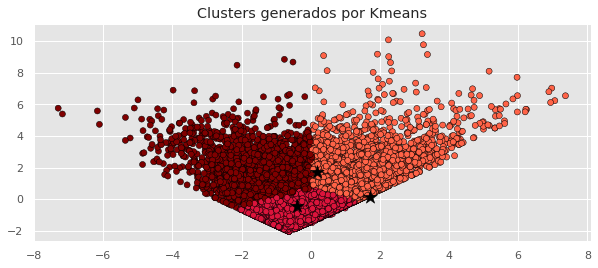

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
color_theme = np.array(['crimson', 'tomato', 'maroon','darkorange'])

ax.scatter(
    y = pca_nombres_muestra2.componente_1,
    x = pca_nombres_muestra2.componente_2, 
    c = color_theme[pca_nombres_muestra2.kmean_clusters],
    marker    = 'o',
    edgecolor = 'black'
)
    
ax.scatter(
    x = modelo_kmeans.cluster_centers_[:, 0],
    y = modelo_kmeans.cluster_centers_[:, 1],   
    c = 'black',
    s = 200,
    marker = '*',
)
ax.set_title('Clusters generados por Kmeans')

Text(0.5, 0.92, 'Clusters generados por Kmeans (3D)')

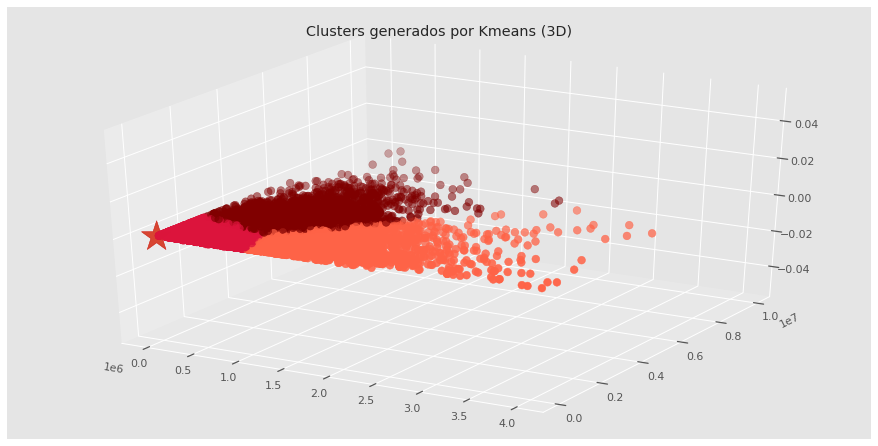

In [ ]:
X = np.array(muestra_limpia[['Renta','CUPO_NAC']])

# Predicting the clusters
labels = modelo_kmeans.predict(sc_muestra2)

# Getting the cluster centers
C = modelo_kmeans.cluster_centers_

colores=['crimson', 'tomato', 'maroon']
asignar=[]

for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(
    X[:, 0], 
    X[:, 1],  
    c=asignar,
    s=60)
ax.scatter(
    C[:, 0], 
    C[:, 1],  
    marker='*', 
    c=colores, 
    s=1000)
ax.set_title('Clusters generados por Kmeans (3D)')

In [ ]:
cantidadGrupo2 =  pd.DataFrame()
cantidadGrupo2['color']=colores
cantidadGrupo2['cantidad']=muestra_2.groupby('kmean_clusters').size()
cantidadGrupo2

,color,cantidad
0,crimson,33244
1,tomato,6753
2,maroon,7795


(Clustering 2D) Para la segunda muestra, se utilizaron los datos de Renta y CUPO_NAC para encontrar alguna similitud por medio de clustering. Primeramente, se puede apreciar una división bastante notoria de los datos; estos se encuentran divididos en 2 grandes grupos a los lados, mientras que existe un grupo más pequeño conformado por una zona central correspondiente al clúster 0. También, se puede observar que, en lo que a los centroides corresponde, la del cluster 0 es la que tiene uno establecido más centrado; mientras que los otros se encuentran o en una esquina, o en parte de otra sección; junto al detalle de que todos se encuentran bastante cerca los unos de los otros, indicando que lo más seguro es que los datos se encuentren muy aglomerados por las cercanías de los centroides. Para verificar que no se esté pasando por alto algún detalle, se pasará a un modelo 3D.

(Clustering 3D) En este modelo se puede apreciar nuevamente la notoria división entre los datos, los cuales se encuentran claramente separados en 3 grupos importantes; sin embargo, se mantiene la pequeña área del cluster 0, y la dispersión de los otros clusters. Observando las cantidades de cada uno, se puede apreciar que el cluster 0 también corresponde al que tiene la mayor cantidad de datos, con una cantidad de 33.244 datos; indicando que estos se encuentran acumulados en la esquina formada en la figura y que el cluster 0 posee la menor distancia intra-cluster de los 3, mientras que los otros clusters poseen una menor cantidad de datos y una mayor distancia entre cada uno (teniendo 6.753 y 7.795 cada uno y ocupando la mayor parte del gráfico). Se puede concluir que existe una agrupación más común (clúster 0) y otras 2 que, si bien poseen una menor densidad de datos, siguen teniendo una cantidad significativa de estos, pudiendo ser utilizados para algún público objetivo de un proyecto del banco que involucre el cupo nacional.


###4.3.3 Tercera muestra.


In [ ]:
modelo_kmeans = KMeans(n_clusters=3, n_init=25, random_state=1234)
modelo_kmeans.fit(sc_muestra3)
centroides = modelo_kmeans.cluster_centers_

In [ ]:
muestra_3['kmean_clusters'] = modelo_kmeans.labels_
muestra_3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Antiguedad,CUPO_NAC,kmean_clusters
0,130,798000,1
1,69,750000,2
2,24,1350000,0
3,134,1570800,1
4,116,2762000,1
...,...,...,...
47787,57,999000,2
47788,39,1744200,2
47789,153,1061000,1
47790,11,1612000,0


In [ ]:
from sklearn.decomposition import PCA

pca= PCA(n_components= 2)
pca_muestra3 = pca.fit_transform(sc_muestra3)
pca_muestra3_df = pd.DataFrame(data= pca_muestra3, columns=['componente_1', 'componente_2'])
pca_nombres_muestra3 = pd.concat([pca_muestra3_df, muestra_3[['kmean_clusters']]], axis=1)

pca_nombres_muestra3

,componente_1,componente_2,kmean_clusters
0,1.798743,-2.187488,1
1,0.458730,-0.917918,2
2,-0.063558,0.484897,0
3,2.451362,-1.705990,1
4,2.940410,-0.446900,1
...,...,...,...
47787,0.384759,-0.478528,2
47788,0.546545,0.453299,2
47789,2.483695,-2.486477,1
47790,-0.149381,0.955215,0


Text(0.5, 1.0, 'Clusters generados por Kmeans')

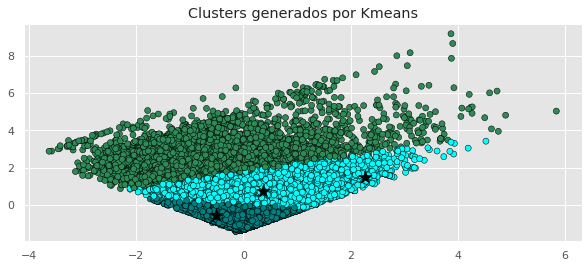

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
color_theme = np.array(['teal', 'seagreen', 'cyan'])

ax.scatter(
    y = pca_nombres_muestra3.componente_1,
    x = pca_nombres_muestra3.componente_2, 
    c = color_theme[pca_nombres_muestra3.kmean_clusters],
    marker    = 'o',
    edgecolor = 'black'
)
    
ax.scatter(
    x = modelo_kmeans.cluster_centers_[:, 0],
    y = modelo_kmeans.cluster_centers_[:, 1],   
    c = 'black',
    s = 200,
    marker = '*',
)
ax.set_title('Clusters generados por Kmeans')

Text(0.5, 0.92, 'Clusters generados por Kmeans (3D)')

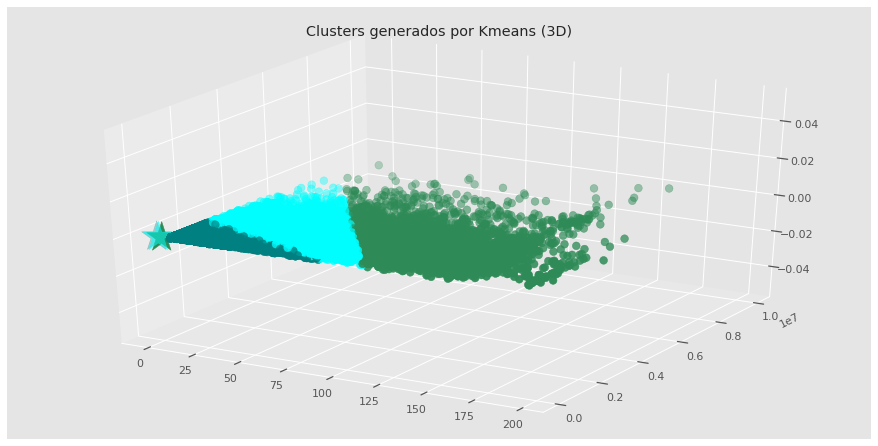

In [ ]:
X = np.array(muestra_limpia[['Antiguedad', 'CUPO_NAC']])

# Predicting the clusters
labels = modelo_kmeans.predict(sc_muestra3)

# Getting the cluster centers
C = modelo_kmeans.cluster_centers_

colores=['teal', 'seagreen', 'cyan']
asignar=[]

for row in labels:
    asignar.append(colores[row])
 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(
    X[:, 0], 
    X[:, 1], 
    c=asignar,
    s=60)
ax.scatter(
    C[:, 0], 
    C[:, 1], 
    marker='*', 
    c=colores, 
    s=1000)
ax.set_title('Clusters generados por Kmeans (3D)')

In [ ]:
cantidadGrupo3 =  pd.DataFrame()
cantidadGrupo3['color']=colores
cantidadGrupo3['cantidad']=muestra_3.groupby('kmean_clusters').size()
cantidadGrupo3

,color,cantidad
0,teal,31162
1,seagreen,5102
2,cyan,11528


Respecto a la tercera muestra podemos ver que las observaciones se van a dividir en tres conjuntos principales (clusters), esto nos ayudará a encontrar similitudes entre las propiedades que entregamos por parámetros al modelo. En este caso lo que entregamos fue la tercera muestra del conjunto. Esta muestra contiene la antigüedad y el cupo nacional para compras con crédito. Esto ya que queremos encontrar dentro de estas propiedades de la base de datos, conjuntos que compartan similitudes o características en común y entregar información que sirva para que el banco logre reconocer características de sus clientes y poder observar patrones.
De esta tercera muestra podemos destacar que se realizaron 3 clusters que agrupan los datos en base a similitudes. En el diagrama 2D podemos observar que existe un color que parece predominar en la densidad de los datos, este color verde marino sobresale en comparación a los otros colores, por lo que podríamos, dar una primera hipótesis, que se explica como: La mayor cantidad de observaciones pertenecen al cluster 1 y a primera vista podríamos decir que estos tienen una antigüedad alta y un cupo internacional sobre los 600000. Pero, ¿Qué pasaría si agregamos otra dimensión al gráfico?¿Cambiará la percepción de los datos?¿Podrían surgir más hipótesis?. Con estas incógnitas en mente nos planteamos también realizar un gráfico 3D. Las primeras impresiones de este gráfico favorecen a la hipótesis anteriormente mencionada, pero requerimos de números, como respaldo de la hipótesis, pues podemos estar siendo engañados por un fallo en la percepción de la dispersión de datos del conjunto de observaciones. Con esto en mente procedimos a realizar un dataframe que contuviera la agrupación de registros por la variable ‘kmean_clusters’. Gracias a los números representados podemos ver que la hipótesis anterior era incorrecta, y que si se trataba de una mayor dispersión de datos y no de mayor densidad, teniendo como cantidad de registros totales el cluster 1 de 5102, siendo sobrepasado por el cluster 2 con 11428 y el cluster 0 con 31162. El cluster que más datos agrupó como anteriormente mencionamos fue el color azul verdoso, que en el gráfico se muestra como una pequeña parte de los datos pero esto se explica por tener la menor distancia intra-cluster muy mínima, y como primer vistazo, las similitudes que comparte este cluster son una alta antigüedad en el banco y un alto cupo nacional para compras con crédito, lo que nos hace notar que la mayor cantidad de clientes en la base de datos, son clientes antiguos y que gastan mucho sin atrasarse con sus pagos. También sabemos que el cupo depende del sueldo, así que podemos estimar que los clientes de este cluster tienen un sueldo alto.
